In [1]:
#import  the neccesarry libraries required for analysis

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data

infy = pd.read_csv('INFY2019.csv')
infy['MA10'] = infy['Close Price'].rolling(10).mean()
infy['MA50'] = infy['Close Price'].rolling(50).mean()
infy = infy.dropna()
infy = infy.drop(['Symbol', 'Series', 'Average Price', 'High Price', 'Low Price', 'Last Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty','% Dly Qt to Traded Qty'], axis = 1)
infy.head()

,Date,Prev Close,Open Price,Close Price,MA10,MA50
49,22-Nov-2019,713.25,711.75,693.20,705.060,746.527
50,25-Nov-2019,693.20,693.35,698.10,704.055,743.907
51,26-Nov-2019,698.10,705.00,690.60,702.675,741.317
52,27-Nov-2019,690.60,694.25,695.75,703.115,738.904
53,28-Nov-2019,695.75,699.10,701.85,702.770,736.355


In [3]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

infy['Shares'] = [1 if infy.loc[ei, 'MA10']>infy.loc[ei, 'MA50'] else 0 for ei in infy.index]

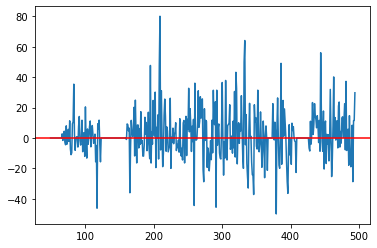

In [4]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

infy['Close1'] = infy['Close Price'].shift(-1)
infy['Profit'] = [infy.loc[ei, 'Close1'] - infy.loc[ei, 'Close Price'] if infy.loc[ei, 'Shares']==1 else 0 for ei in infy.index]
infy['Profit'].plot()
plt.axhline(y=0, color='red')

In [5]:
#Use .cumsum() to calculate the accumulated wealth over the period

infy['wealth'] = infy['Profit'].cumsum()
infy.tail()

,Date,Prev Close,Open Price,Close Price,MA10,MA50,Shares,Close1,Profit,wealth
491,31-Aug-2021,1698.05,1700.15,1706.45,1724.420,1620.962,1,1677.75,-28.70,864.50
492,01-Sep-2021,1706.45,1709.50,1677.75,1718.030,1624.511,1,1689.10,11.35,875.85
493,02-Sep-2021,1677.75,1677.35,1689.10,1713.595,1628.056,1,1700.65,11.55,887.40
494,03-Sep-2021,1689.10,1696.05,1700.65,1710.365,1632.006,1,1730.40,29.75,917.15
495,06-Sep-2021,1700.65,1705.15,1730.40,1709.530,1635.430,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 917.1500000000002')

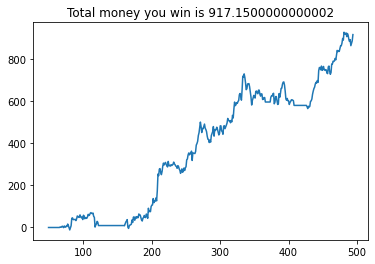

In [6]:
#plot the wealth to show the growth of profit over the period

infy['wealth'].plot()
plt.title('Total money you win is {}'.format(infy.loc[infy.index[-2], 'wealth']))

In [7]:
# let play around with data by calculating the log daily return

infy['LogReturn'] = np.log(infy['Close Price']).shift(-1) - np.log(infy['Close Price'])

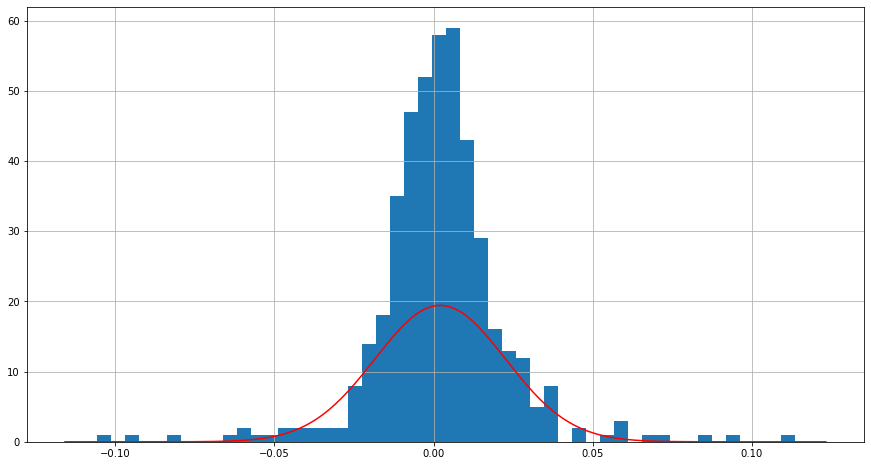

In [8]:
# Plot a histogram to show the distribution of log return of the stock. 
# You can see it is very close to a normal distribution
from scipy.stats import norm
mu = infy['LogReturn'].mean()
sigma = infy['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(infy['LogReturn'].min()-0.01, infy['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

infy['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [9]:
# probability that the stock price to drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  0.0056127574125140346


In [10]:
# the probability that the stock price to drop over 10% in a day
prob_return1 = norm.cdf(-0.1, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  3.325583748284297e-07


In [11]:
# drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.0025892939053102715


In [12]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = norm.cdf(-0.2, mu220, sigma220)
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  0.016223705982444776


In [13]:
# Value at risk(VaR): Probability to 
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.03171466437374609


In [14]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.03171466437374609
95% quantile  0.035816858619474326


In [15]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma)
print('75% quantile ', q75)

25% quantile  -0.01179491304111566
75% quantile  0.0158971072868439


In [16]:
# we will use log return for average stock return of Microsoft

infy['logReturn'] = np.log(infy['Close Price'].shift(-1)) - np.log(infy['Close Price'])

In [17]:
# Lets build 90% confidence interval for log return
sample_size = infy['logReturn'].shape[0]
sample_mean = infy['logReturn'].mean()
sample_std = infy['logReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

# upper and lower bound
interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std

In [18]:
# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (0.0008067784578964547, 0.003295415787831787)
